# WEEK4 HW2: WEIGHTED SVM - toy dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import roc_curve

In [2]:
X, y = make_classification(n_samples = 10000, n_features = 2, n_redundant = 0,
                           n_clusters_per_class = 1, weights = [0.99], flip_y = 0,
                           random_state = 4)

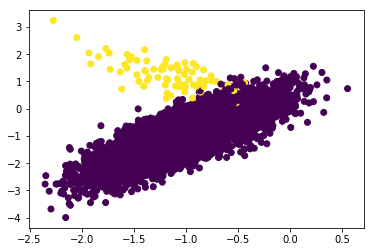

In [3]:
plt.scatter(X[:, 0], X[:, 1], c = y)

In [4]:
model = SVC(gamma = 'auto')
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores = cross_val_score(model, X, y, scoring = 'roc_auc', cv = cv, n_jobs = -1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.846


In [5]:
model = SVC(gamma = 'auto', class_weight = 'balanced')
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores = cross_val_score(model, X, y, scoring = 'roc_auc', cv = cv, n_jobs = -1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.979


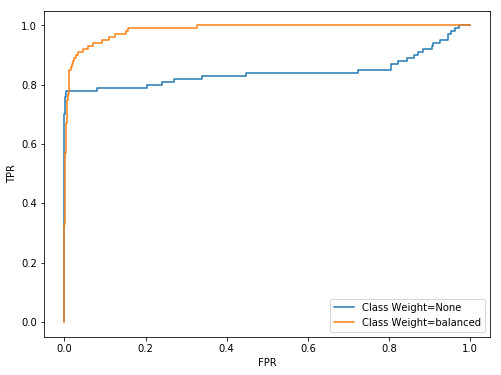

In [6]:
fig = plt.figure(figsize = (8, 6))
model = SVC(gamma = 'auto')
model.fit(X, y)
fpr, tpr, _ = roc_curve(y, model.decision_function(X), pos_label = 1)
plt.plot(fpr, tpr, label = 'Class Weight=None')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

model = SVC(gamma = 'auto', class_weight = 'balanced')
model.fit(X,y)
fpr, tpr, _ = roc_curve(y, model.decision_function(X), pos_label = 1)
plt.plot(fpr, tpr, label = 'Class Weight=balanced')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()